# Mini-Project: SVM&LR Classification
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 

## SVM and Logistic Regression Modeling


### Create Models [50 points] 
Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing
logistic regression and linear support vector machines. For many problems, SGD will be
required in order to train the SVM model in a reasonable timeframe.   

### Load and Clean Data Set

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
#read data from github repository
#this data was produced from the Iowa Alcohol Dataset 2019 year data
#It was cleansed and transformed in this notebook and exported as a csv to github for use here.
#source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb
# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data = pd.read_csv(url_dataset, nrows=100000)
#data = pd.read_csv(url_dataset)

In [3]:
print(data.shape)
print(list(data.columns))

(100000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [4]:
data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.35499999999999
percentage of whiskey 22.645


In [5]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
         'store_parent_CVS', 'store_parent_Caseys', 
         'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml',
       'liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter_trans', 'store_parent_CVS',
       'store_parent_Caseys', 'store_parent_Hy-Vee',
       'store_parent_Kum&Go', 'store_parent_Other',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

### Train and Test Set (20% Test / 80% Train)

In [0]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

## Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics#### Logistic Regression model:

### Model 1

In [7]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = linear_model.LogisticRegressionCV( Cs=100)# class_weight = 'balanced')

logisticRegr.fit(X_train, y_train)

coef = logisticRegr.coef_[0]
classes = logisticRegr.classes_[0]
intercept = logisticRegr.intercept_[0]
print (coef)

print (intercept)

predictions = logisticRegr.predict(X_test)

params =logisticRegr.get_params(deep=True)
print (params)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy: ", '\n', score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[ 0.61447349  0.16389739  0.03226828 -0.05153792  0.19965991 -0.13236628
  0.0099846   1.7321152  -1.06729096  0.4505761   0.02319899 -0.00208728]
-6.29558985743062
{'Cs': 100, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Accuracy:  
 0.8425
Confusion Matrix:  
 [[14782   744]
 [ 2406  2068]]


### Adjust Parameters for Logistic Regression

### Model 2

In [8]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 1
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf2 = LogisticRegression(C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    #X_train = X[train_indices]
    #y_train = y[train_indices]
    
   # X_test = X[test_indices]
    #y_test = y[test_indices]
    

    # train the reusable logisitc regression model on the training data
    lr_clf2.fit(X_train,y_train)  # train object
    y_hat = lr_clf2.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 0  ====
accuracy 0.8403
confusion matrix
 [[14553   973]
 [ 2221  2253]]


###Model 3 (Using Grid Search to get the optimal parameters)

In [9]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=2, test_size=0.10, random_state=0)

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2', 'l1', 'elasticnet']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
              ,'max_iter':[100,500]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=2 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train, y_train)

Fitting 2 folds for each of 420 candidates, totalling 840 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 13.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 30.1min
[Parallel(n_jobs=2)]: Done 840 out of 840 | elapsed: 31.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100, 500],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'r

In [10]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=0.01, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
type(regGridSearch)

sklearn.model_selection._search.GridSearchCV

In [0]:
gridresults = pd.DataFrame(regGridSearch.cv_results_)

In [0]:
columns = ['param_solver','param_C', 'param_max_iter', 'param_penalty', 'mean_test_score', 'rank_test_score']
gridresults = pd.DataFrame(gridresults, columns=columns)

In [14]:
gridresults.sort_values(by=['rank_test_score'], ascending=True).head(20)

,param_solver,param_C,param_max_iter,param_penalty,mean_test_score,rank_test_score
90,lbfgs,0.01,100,l2,0.846250,1
150,lbfgs,0.1,100,l2,0.845938,2
330,lbfgs,100,100,l2,0.845438,3
270,lbfgs,10,100,l2,0.844688,4
390,lbfgs,1000,100,l2,0.844437,5
45,lbfgs,0.001,500,l2,0.843000,6
48,newton-cg,0.001,500,l2,0.842812,7
33,newton-cg,0.001,100,l2,0.842812,7
210,lbfgs,1,100,l2,0.842562,9
345,lbfgs,100,500,l2,0.842313,10


In [15]:
y_hat = regGridSearch.predict(X_test) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.8493
confusion matrix
 [[14517  1009]
 [ 2005  2469]]


In [16]:
# run logistic regression of the grid search
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 1
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf4 = regGridSearch.best_estimator_

 # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    #X_train = X[train_indices]
    #y_train = y[train_indices]
    
    #X_test = X[test_indices]
   # y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf4.fit(X_train,y_train)  # train object
    y_hat = lr_clf4.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 0  ====
accuracy 0.8493
confusion matrix
 [[14517  1009]
 [ 2005  2469]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


####Plot the Grid Search Classifier 

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = regGridSearch.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.873


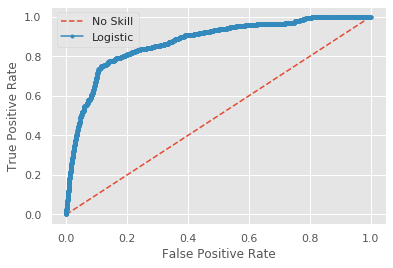

In [22]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Classifier Estimation

In [0]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X_train, y_train, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X_train, y_train, cv=cv)
    
      #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y_train, predictions)
    confMat = confusion_matrix(y_train,predictions)
    acc = accuracy_score(y_train,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)

In [24]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_train, y_train, cv)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

The average accuracy for all cv folds is: 			 0.84481
The average precision for all cv folds is: 			 0.68402
The average recall for all cv folds is: 			 0.56758
*********************************************************
Cross Validation Fold Mean Error Scores


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy,Precision,Recall
0,0.846125,0.675731,0.568650
1,0.843500,0.692308,0.566502


In [25]:
EvaluateClassifierEstimator2(classifierEst, X_train, y_train, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     61829
           1       0.70      0.55      0.62     18171

    accuracy                           0.84     80000
   macro avg       0.79      0.74      0.76     80000
weighted avg       0.84      0.84      0.84     80000

[[57621  4208]
 [ 8208  9963]]
0.8448


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

When to Use ROC vs. Precision-Recall Curves? Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.611


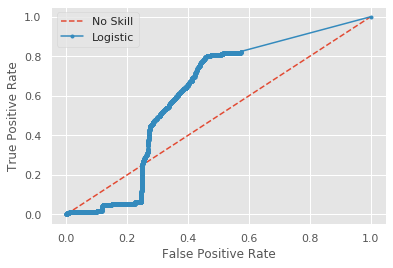

In [27]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

Logistic: f1=0.000 auc=0.257


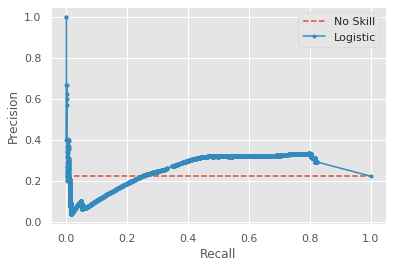

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Support Vector Machine Model:

In [30]:
#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
from sklearn.preprocessing import StandardScaler

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', random_state=0)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
svclassifier = LinearSVC(C=100)
model = svclassifier.fit(X_std, y_train)
model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

can adjust costs per error to help you redraw the line in different ways to find the optimial accuracy.

In [31]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[11957  3569]
 [ 1103  3371]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     15526
           1       0.49      0.75      0.59      4474

    accuracy                           0.77     20000
   macro avg       0.70      0.76      0.71     20000
weighted avg       0.82      0.77      0.78     20000



In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.8699
[[14574   952]
 [ 1650  2824]]


In [35]:
# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE LINEAR
from sklearn.svm import SVC

# train the model just as before
#warning
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.8444
[[14676   850]
 [ 2262  2212]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     15526
           1       0.72      0.49      0.59      4474

    accuracy                           0.84     20000
   macro avg       0.79      0.72      0.75     20000
weighted avg       0.83      0.84      0.83     20000



In [0]:
#testing another set
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data2 = pd.read_csv(url_dataset, nrows=200000)


In [0]:
data2 = data2.iloc[100000:150000]

In [38]:
data2 = data2.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data2[data2['liquor_category_WHISKY']==0])
count_whiskey = len(data2[data2['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.96
percentage of whiskey 22.040000000000003


In [39]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml','liquor_category_WHISKY']
data_final2=data2[to_keep]
data_final2.columns.values

array(['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

In [0]:
data_final2 = data_final2.reset_index(drop=True)

In [41]:
data_final2.head()

,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml,liquor_category_WHISKY
0,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
1,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
2,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
3,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
4,4.782479,9.95,2.297573,1.891605,2.484907,2.484907,12,1000,0


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separating out the features
#x2 = data_final2.loc[:, to_keep].values
x2 = data_final2.loc[:, data_final2.columns != 'liquor_category_WHISKY']
y2 = data_final2.loc[:, data_final2.columns == 'liquor_category_WHISKY']


# Standardizing the features
x2 = StandardScaler().fit_transform(x2)
xss = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=8)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2)
#             , columns = ['principal component 1', 'principal component 2', '3',
#                         '4', '5'])

finalDf2 = pd.concat([principalDf2, data_final2[['liquor_category_WHISKY']]], axis = 1)
pca2.explained_variance_ratio_


array([4.07054379e-01, 2.83252730e-01, 1.96844857e-01, 6.37224778e-02,
       4.08482401e-02, 8.23083684e-03, 4.64795125e-05, 7.45199278e-21])

In [44]:
finalDf2.head()

,0,1,2,3,4,5,6,7,liquor_category_WHISKY
0,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.302943e-10,0
1,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.304081e-10,0
2,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.303417e-10,0
3,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.304089e-10,0
4,-1.443308,-0.379392,0.099647,0.281748,-0.084971,0.104381,-0.000955,3.543468e-11,0


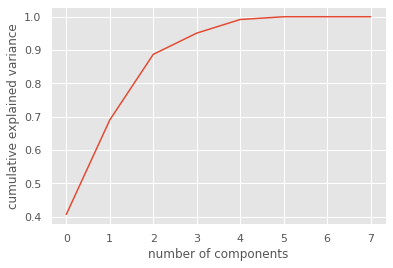

In [45]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [0]:
#PCA version additional testing ~62% accuracy
X = finalDf2.loc[:, finalDf2.columns != 'liquor_category_WHISKY']
y = finalDf2.loc[:, finalDf2.columns == 'liquor_category_WHISKY']

#non PCA version additional testing ~83 accuracy
#X = data_final2.loc[:, data_final2.columns != 'liquor_category_WHISKY']
#y = data_final2.loc[:, data_final2.columns == 'liquor_category_WHISKY']

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=1, random_state=0)

In [0]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_train)

In [49]:
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [53]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_train, y_train)
print(score)

0.8387375


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, predictions)
print("Confusion Matrix: ", '\n', cm)

Confusion Matrix:  
 [[58947  2882]
 [10019  8152]]


Logistic: f1=0.558 auc=0.703


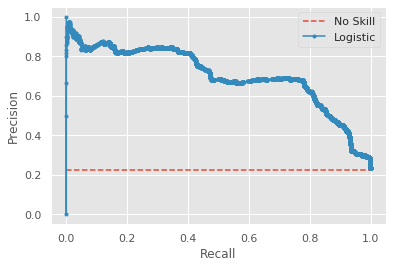

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_train)
lr_precision, lr_recall, _ = precision_recall_curve(y_train, lr_probs)
lr_f1, lr_auc = f1_score(y_train, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### SGD

In [59]:
%%time
# now divide the data into test and train using scikit learn built-ins
from sklearn.model_selection import StratifiedShuffleSplit 
cv = StratifiedShuffleSplit( n_splits=1,test_size=0.8)
# use some compact notation for creating a linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier
regularize_const = 0.1
iterations = 5

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

CPU times: user 85 µs, sys: 21 µs, total: 106 µs
Wall time: 112 µs


In [60]:
from sklearn import metrics as mt
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat = log_sgd.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print('SGD Accuracy:', acc)
print('confusion matrix:', conf)

SGD Accuracy: 0.8142
confusion matrix: [[30941   243]
 [ 7189  1627]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Advantages  [10 points] 
Discuss the advantages of each model for each classification task. Does one
type of model offer superior performance over another in terms of prediction accuracy? In
terms of training time or efficiency? Explain in detail.  
 


###  Interpret  [30 points] 
Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important? 

In [18]:
# interpret the weights

# iterate over the coefficients
weights2 = lr_clf4.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sale_dollars_trans has weight of 0.3567659813898897
cost_per_liter_trans has weight of -0.7110548408836393
store_parent_CVS has weight of 0.021358761886249678
store_parent_Caseys has weight of -0.09955257395815119
store_parent_Hy-Vee has weight of -0.10463610307408837
store_parent_Kum&Go has weight of -0.15945695415701902
store_parent_Other has weight of -0.21838858624033897
state_bottle_cost_trans has weight of 2.258138802647013
bottles_sold_trans has weight of -1.5783247442288686
volume_sold_liters_trans has weight of 1.0678208227946975
pack has weight of -0.03228758004258863
bottle_volume_ml has weight of -0.004427468725428769


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt


# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
#lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
logisticRegr.fit(X_train_scaled,y_train)  # train object

y_hat = logisticRegr.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf4.coef_.T,data_final.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.843
[[14843   683]
 [ 2457  2017]]
bottles_sold_trans has weight of -1.5783247442288686
cost_per_liter_trans has weight of -0.7110548408836393
store_parent_Other has weight of -0.21838858624033897
store_parent_Kum&Go has weight of -0.15945695415701902
store_parent_Hy-Vee has weight of -0.10463610307408837
store_parent_Caseys has weight of -0.09955257395815119
pack has weight of -0.03228758004258863
bottle_volume_ml has weight of -0.004427468725428769
store_parent_CVS has weight of 0.021358761886249678
sale_dollars_trans has weight of 0.3567659813898897
volume_sold_liters_trans has weight of 1.0678208227946975
state_bottle_cost_trans has weight of 2.258138802647013


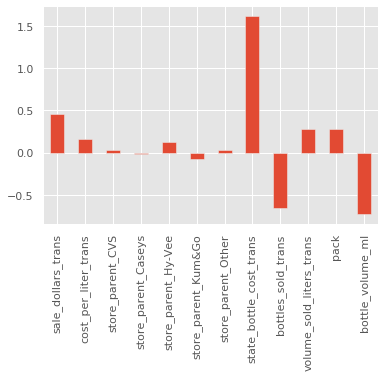

In [20]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(logisticRegr.coef_[0],index=X.columns)
weights.plot(kind='bar')
plt.show()

### Insight into the data [10 points]
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [67]:
#view support vectors
svm_clf.support_vectors_.shape

(29108, 12)

In [68]:
# View indicies of support vectors
svm_clf.support_.shape

(29108,)

This chooses all the misclassified items as a support vectors.

In [63]:
#view number of support vectors for each class
svm_clf.n_support_

array([14563, 14545], dtype=int32)

We used 14,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

In [76]:
X_train_scaled.columns

AttributeError: ignored

In [78]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights3 = pd.Series(svm_clf.coef_[0],index=X_train_scaled.(columns=[X_train_scaled[1:]]))
weights3.plot(kind='bar')

SyntaxError: ignored

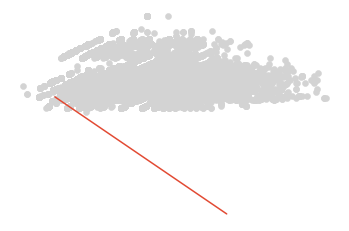

In [80]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svm_clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

#### Plot our SVC models

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics as mt

# we want to predict the X and y data as follows:
if 'liquor_category_WHISKY' in data_final:
    y = data_final['liquor_category_WHISKY'].values # get the labels we want
    del data_final['liquor_category_WHISKY'] # get rid of the class label
    X = data_final.values # use everything else to predict!

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, 
                            test_size = 0.20, train_size = 0.80, random_state=1)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

In [96]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = data_final.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['liquor_category_WHISKY'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
data_final['liquor_category_WHISKY'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29108 entries, 9121 to 69667
Data columns (total 13 columns):
sale_dollars_trans          29108 non-null float64
cost_per_liter_trans        29108 non-null float64
store_parent_CVS            29108 non-null int64
store_parent_Caseys         29108 non-null int64
store_parent_Hy-Vee         29108 non-null int64
store_parent_Kum&Go         29108 non-null int64
store_parent_Other          29108 non-null int64
state_bottle_cost_trans     29108 non-null float64
bottles_sold_trans          29108 non-null float64
volume_sold_liters_trans    29108 non-null float64
pack                        29108 non-null int64
bottle_volume_ml            29108 non-null int64
liquor_category_WHISKY      29108 non-null int64
dtypes: float64(5), int64(8)
memory usage: 3.1 MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


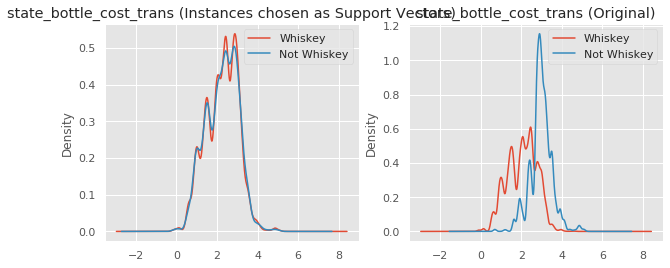

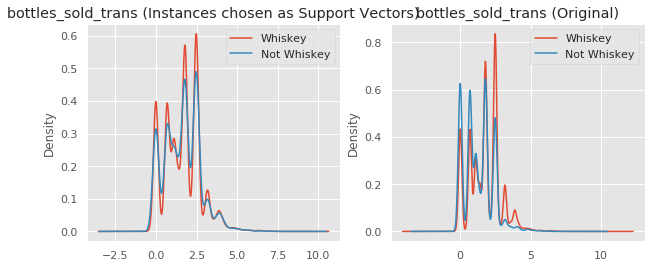

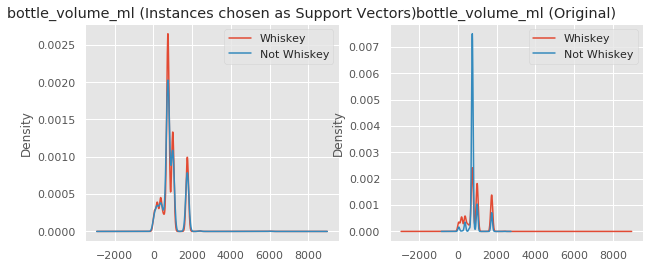

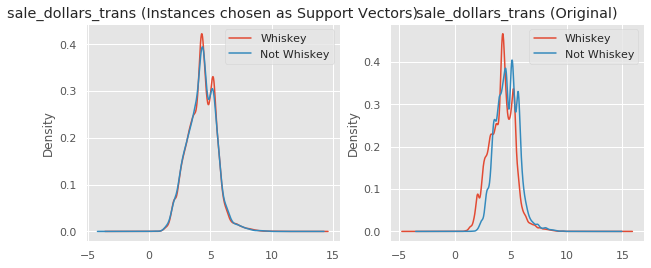

In [98]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['liquor_category_WHISKY'])
df_grouped = data_final.groupby(['liquor_category_WHISKY'])

# plot KDE of Different variables
vars_to_plot = ['state_bottle_cost_trans','bottles_sold_trans','bottle_volume_ml','sale_dollars_trans']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Original)')

#### Joint Plot

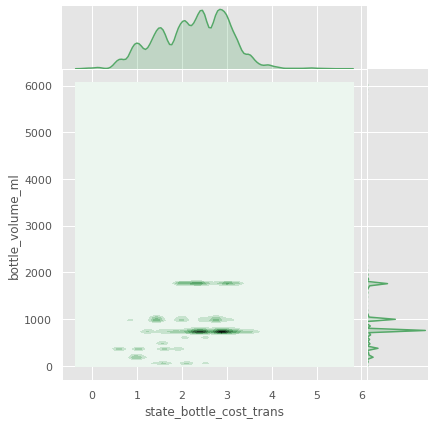

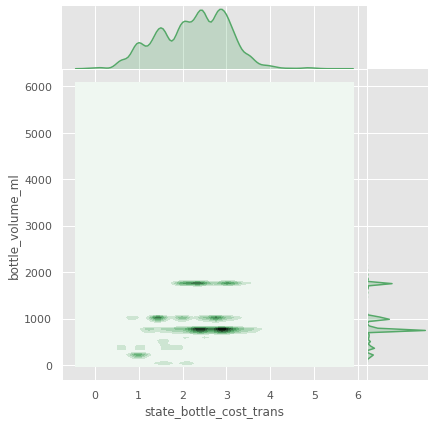

In [99]:
# Joint Plot
# Source:
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
import seaborn as sns

# Original dataset
g = sns.jointplot("state_bottle_cost_trans", "bottle_volume_ml", data=data_final, kind="kde", space=0, color="g")

# Support Vector
g = sns.jointplot("state_bottle_cost_trans", "bottle_volume_ml", data=df_support, kind="kde", space=0, color="g")

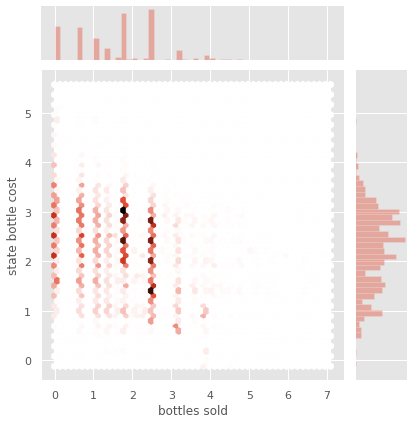

In [100]:
# Joint Plot
# Source:
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
import seaborn as sns;
x = df_support['bottles_sold_trans']
y = df_support['state_bottle_cost_trans']
g = (sns.jointplot(x, y, kind="hex", stat_func=None).set_axis_labels("bottles sold", "state bottle cost"))

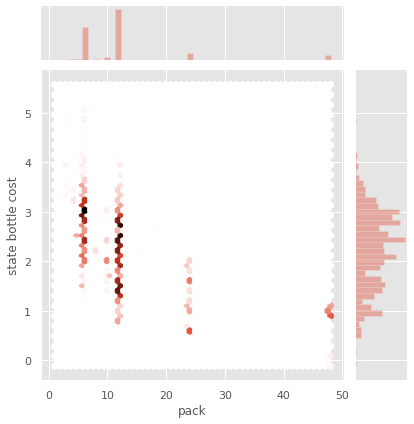

In [101]:
# Joint Plot
# Source:
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
import seaborn as sns;
x = df_support['pack']
y = df_support['state_bottle_cost_trans']
g = (sns.jointplot(x, y, kind="hex", stat_func=None).set_axis_labels("pack", "state bottle cost"))